# Trajectory Uncertainty

*You are seeing the
notebook output generated by
[Literate.jl](https://github.com/fredrikekre/Literate.jl) from the
[Julia source file](https://github.com/Crown421/GPDiffEq.jl/blob/main/examples/gpode/script.jl).
The rendered HTML can be viewed [in the docs](https://juliagaussianprocesses.github.io/AbstractGPs.jl/dev/examples/gpode/).*

When the vector field $\dot{x} = f(x)$ is given by a Gaussian process, we have uncertainty in the vector field, which we can lift to the trajectory. In this example we show how to use the approximate `PULL` solvers, introduced in [this paper](https://arxiv.org/abs/2211.11103), to propagate this uncertainty.

## Setup

In [1]:
using GPDiffEq
using Plots

## Defining a simple GP
In this example we sample the vector field values directly instead of learning them from a trajectory.

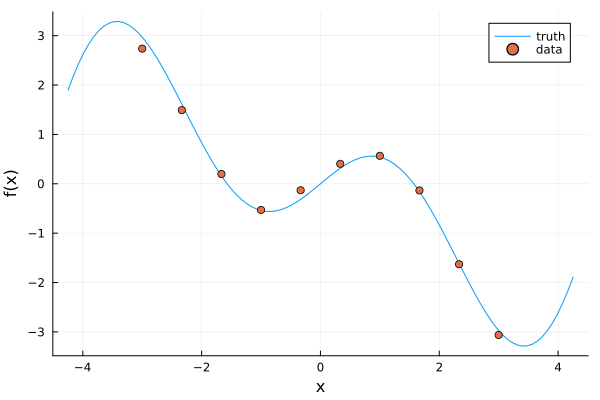

In [2]:
ts = range(-4.25, 4.252; length=100)
f(x) = x * cos(x)

X = range(-3.0, 3.0; length=10)
σ_n = 0.1
y = f.(X) .+ σ_n * randn(length(X))
p = plot(ts, f.(ts); label="truth", xlabel="x", ylabel="f(x)")
scatter!(p, X, y; label="data")

With this data, we define the GP.

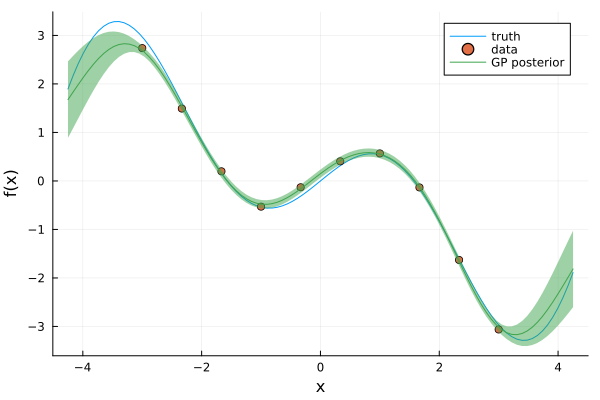

In [3]:
ker = SqExponentialKernel()
gp = GP(ker)
fx = gp(X, σ_n^2)

fp = posterior(fx, y)

plot!(p, ts, mean(fp, ts); ribbons=sqrt.(var(fp, ts)), label="GP posterior")

## A GPODE problem

We define a `GPODEProblem` with the GP as the vector field.

In [4]:
ff = GPODEFunction(fp)

prob = GPODEProblem(ff, 1.0, (0.0, 4.0))

GPODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 4.0)
u0: 1.0

and integrate with the PULL Euler solver.

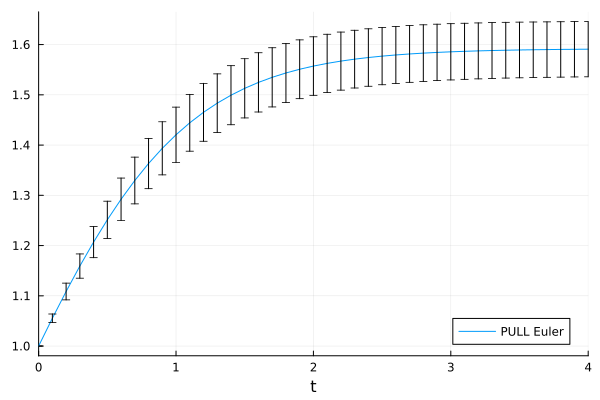

In [5]:
sol = solve(prob, PULLEuler(); dt=0.1)

plot(sol; label="PULL Euler", legend=:bottomright)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*